<h1> Cousera Capstone Project </h1>
<h4> This notebook will be used for the completion of my Capstone project as part of the Coursera IBM Data Science Professional Certificate </h4>

<h3> Problem 1: </h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<h3> Problem 2: </h3>

<h4> Use the Notebook to build the code to scrape the following Wikipedia page </h4>

In [11]:
from bs4 import BeautifulSoup
import requests

In [12]:
Data_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

Source = requests.get(Data_url).text

soup = BeautifulSoup(Source, 'xml')

table = soup.find('table')

In [13]:
column_names=['Postalcode','Borough','Neighbourhood']
df = pd.DataFrame(columns=column_names)

In [14]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [15]:
df.head()

,Postalcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


<h3> Problem 3: </h3>
<h4> Create the Dataframe to the desired specifications </h4>

In [16]:
# Get names of indexes for which column Borough has value "Not assigned"
indexNames = df[ df['Borough'] =='Not assigned'].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [17]:
df.head()

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [20]:
# If a cell has a Borough, but no neighbourhood:
df.loc[df['Neighbourhood'] =='Not assigned' , 'Neighbourhood'] = df['Borough']
df.head(10)

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [21]:
# Any entries with the same postcode will be joined and separated with a comma:
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)

In [22]:
clean_df = result.reset_index()
clean_df.head()

,Postalcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [23]:
clean_df.shape

(103, 3)

<h3> Problem 4: </h3>
<h4> Get the latitude and the longitude coordinates of each neighborhood </h4>

In [26]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [27]:
geo_df = pd.read_csv('http://cocl.us/Geospatial_data')

geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [32]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
merged_df = pd.merge(geo_df, clean_df, on='Postalcode')

In [35]:
geo_data = merged_df[['Postalcode','Borough','Neighbourhood','Latitude','Longitude']]  

geo_data.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [37]:
geo_data = geo_data.rename(columns = {'Postalcode': 'Postal Code'})

In [38]:
geo_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [39]:
pip install conda

Note: you may need to restart the kernel to use updated packages.


In [44]:
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [43]:
pip install geopy

     |████████████████████████████████| 111 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(geo_data['Latitude'],geo_data['Longitude'], geo_data['Borough'],  geo_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

<h4> Clustering using K-Means </h4>

In [52]:
k=5
toronto_clustering = geo_data.drop(['Postal Code','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
geo_data.insert(0, 'Cluster Labels', kmeans.labels_)

In [53]:
geo_data.head()

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,2,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,2,M1G,Scarborough,Woburn,43.770992,-79.216917
4,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [54]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(geo_data['Latitude'], geo_data['Longitude'], geo_data['Neighbourhood'], geo_data['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<center> <u> <h1> The Battle of the Neighborhoods (Week 1) </h1> </u>
    <h2> Finding suitable locations to open a gym in London, UK </h2>
    <h2> Hayley Dunville (August 2020) </h2> </center>
    
    
<u> <h3> Contents </h3> </u>    
<ul> <li> Introduction </li>
    <li> Data </li>
    <li> Methodology </li>
    <li> Results </li>
    <li> Discussion </li>
    <li> Conclusion </li> </ul>
    
    

<u> <h3> Introduction </h3> </u>


The aim of this project is to find suitable locations to open a gym in the Central London area, UK.
The first requirement is that the new gym should be easily accessible by its prospective customers and, more specifically, it should be located near an underground station. The number of gyms already existing in an area should also be considered so that competition be avoided if possible.

For the objectives of this project to be achieved, python geolocation libraries will be used, along with the Foursquare API. In order to create clusters of potential locations for gyms, the K-Means machine learning clustering algorithm will be used.


<u> <h3> Data </h3> </u>


In order to successfully complete this project, the following data will need to be collected:

<ul> <li> A list of the underground stations and their locations </li>
    <li> The number of existing gyms in proximity to each underground station </li>
    <li> The distance to the nearest gyms to each station </li> </ul>

In order to obtain the data, a combination of the geopy Python library and the Foursquare API will be used:

<ol> <li> For this project, Waterloo Station will be considered to be the center of London. This station is one of the most central location in the city. The geospatial coordinates of this station will be obtained using the geopy library. </li>
<li> After the coordinates of the ‘center’ of London have been obtained, the Foursquare API will be used to retrieve data for all the underground stations in London in a radius of 15 km. </li>
<li> To find the existing gyms near the underground stations, the Foursquare API will be used again for each station. Data will then be obtained for all of the gyms located in a radius of 750 meters of every station. </li> </ol>

Using the collected data, the number of existing gyms near each station will be calculated. The minimum distance to a gym from every station can then be calculated. This minimum distance to every station from a gym, along with the number of already existing gyms near the station will be used as input to K-Means clustering algorithm to obtain the clusters of areas (underground stations).


<u> <h3> Methodology </h3> </u>
The objective of this project is to gather information regarding unerground stations in the Central London area with potential for opening a gym, and having the following criteria:

<ul> <li> Low number of existing gyms </li>
    <li> Minimum distance of existing gyms to its nearby station </li> </ul>
    
The steps to identifying potential areas (underground stations) are as follows:

<ol> <li> Consider Waterloo Station as the ‘center’ of London. </li>
    <li> Based on the coordinates of Waterloo Station, information regarding underground stations in a radius of 15 km using the Foursquare API will be gathered. </li>
        <li> After the collection of underground station data, the Foursquare API will be used to locate all of the existing gyms in a radius of 750 meters from each station. At this stage, only the results that correspond to the description of ‘Gym / Fitness Center’ and ‘Gym’ subcategories will be kept and subcategories, such as ‘Dance Studio’, ‘Yoga Studio’, ‘Martial Arts Dojo’ etc., will be removed. The dataset will also contain the distance of each gym to the corresponding station. </li>
    <li> After the data regarding gyms within the vicinity of underground stations has been collected, the number of existing gyms near each station will be calulated, in addition to the minimum distance from each station to a gym. </li>
   <li> The data will be normalised so that both factors (minimum distance, number of existing gyms) will have equal weight when K-Means algorithm is applied. </li>
    <li> The K-Means algorithm will be used to divide the data into clusters of similar locations and the elbow method will be used to find the most suitable value for K </li> </ol>

In [55]:
from geopy.geocoders import Nominatim 

import pandas as pd

from pandas.io.json import json_normalize

import folium 

import requests

import numpy as np

from sklearn.cluster import KMeans

from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.pyplot import subplots

from sklearn import preprocessing

print('Libraries imported.')

Libraries imported.


<h3> Data Acquisition, Cleaning and Transformation </h3>

In [56]:
address = 'Waterloo Station, London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Waterloo Station, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Waterloo Station, London are 51.503634, -0.1133529.


In [57]:
string = str(latitude) + ', ' +str(longitude)
address = geolocator.reverse(string, language='en')
address

Location(Waterloo Station, The Balcony, South Bank, Lambeth, London Borough of Lambeth, London, Greater London, England, SE1 8SW, United Kingdom, (51.503634, -0.1133529, 0.0))

Display London Station on a map:

In [58]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=18)
folium.Marker([latitude, longitude], popup='Waterloo Station').add_to(london_map)
london_map

In [1]:
# @hidden_cell
CLIENT_ID = "DFCZLYECCVOFQCJVCZGWA2D5EX0ZMUW0FYZBFVUGBMRSL0XM"
CLIENT_SECRET = "DWVNF2OGTYJWERUCFZW24EYHVCI3NNUJLYRUA0IIFAN5HKNM" 

In [62]:
VERSION = "20190630"
LIMIT = 200
RADIUS = 15000
CATEGORY_ID = '4bf58dd8d48988d1fd931735'

In [63]:
url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude, 
    RADIUS,
    LIMIT
)

In [67]:
# stations_list = results['response']['groups'][0]['items']
stations_list = requests.get(url).json()['response']['groups'][0]['items']
stations_df = pd.json_normalize(stations_list)

stations_df.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id
0,e-0-4b703685f964a520f00b2de3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b703685f964a520f00b2de3,Waterloo London Underground Station,York Rd,at Station App,51.503321,-0.111038,"[{'label': 'display', 'lat': 51.50332146968501...",...,GB,London,Greater London,United Kingdom,"[York Rd (at Station App), London, Greater Lon...","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",0,[],NaN,NaN
1,e-0-4ae9970cf964a5203bb521e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ae9970cf964a5203bb521e3,Westminster London Underground Station,Bridge St,NaN,51.500922,-0.124802,"[{'label': 'display', 'lat': 51.50092199879671...",...,GB,London,Greater London,United Kingdom,"[Bridge St, London, Greater London, SW1A 2JR, ...","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",0,[],NaN,NaN
2,e-0-4ad707f0f964a5207d0821e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ad707f0f964a5207d0821e3,Southwark London Underground Station,68-70 Blackfriars Rd,at The Cut,51.503771,-0.104739,"[{'label': 'display', 'lat': 51.50377121560457...",...,GB,Southwark,Greater London,United Kingdom,"[68-70 Blackfriars Rd (at The Cut), Southwark,...","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",0,[],NaN,NaN
3,e-0-4bfce37bf7c82d7fe95f8d04-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bfce37bf7c82d7fe95f8d04,Lambeth North London Underground Station,110 Westminster Bridge Rd,NaN,51.498521,-0.110355,"[{'label': 'display', 'lat': 51.49852056642949...",...,GB,London,Greater London,United Kingdom,"[110 Westminster Bridge Rd, London, Greater Lo...","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",0,[],NaN,NaN
4,e-0-4ad03fa4f964a520c4d720e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ad03fa4f964a520c4d720e3,Embankment London Underground Station,Villiers St,NaN,51.507241,-0.122396,"[{'label': 'display', 'lat': 51.50724130540982...",...,GB,London,Greater London,United Kingdom,"[Villiers St, London, Greater London, WC2N 6NS...","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",0,[],NaN,NaN


In [68]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.location.postalCode']
stations_filtered_df = stations_df.loc[:, filtered_columns]

# filter the category for each row
stations_filtered_df['venue_type'] = stations_df['venue.categories'].apply(lambda x: dict(x[0])['name'])

# clean columns
stations_filtered_df.columns = [col.split('.')[-1] for col in stations_filtered_df.columns]

stations_df = stations_filtered_df[stations_filtered_df['venue_type'] == 'Metro Station']
stations_df = stations_df.drop('categories', axis=1)
stations_df.head()

,name,lat,lng,distance,postalCode,venue_type
0,Waterloo London Underground Station,51.503321,-0.111038,164,SE1 7ND,Metro Station
1,Westminster London Underground Station,51.500922,-0.124802,848,SW1A 2JR,Metro Station
2,Southwark London Underground Station,51.503771,-0.104739,597,SE1 8NW,Metro Station
3,Lambeth North London Underground Station,51.498521,-0.110355,605,SE1 7XG,Metro Station
4,Embankment London Underground Station,51.507241,-0.122396,744,WC2N 6NS,Metro Station


In [69]:
stations_df = stations_df.rename(columns = {'name': 'Station Name', 'lat': 'Latitude', 'lng': 'Longtitude', 'distance': 'Distance from Station',
                                           'postalCode': 'Station Post Code', 'venue_type': 'Venue Type'})

In [71]:
stations_df.head()

,Station Name,Latitude,Longtitude,Distance from Station,Station Post Code,Venue Type
0,Waterloo London Underground Station,51.503321,-0.111038,164,SE1 7ND,Metro Station
1,Westminster London Underground Station,51.500922,-0.124802,848,SW1A 2JR,Metro Station
2,Southwark London Underground Station,51.503771,-0.104739,597,SE1 8NW,Metro Station
3,Lambeth North London Underground Station,51.498521,-0.110355,605,SE1 7XG,Metro Station
4,Embankment London Underground Station,51.507241,-0.122396,744,WC2N 6NS,Metro Station


In [73]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station Name           97 non-null     object 
 1   Latitude               97 non-null     float64
 2   Longtitude             97 non-null     float64
 3   Distance from Station  97 non-null     int64  
 4   Station Post Code      97 non-null     object 
 5   Venue Type             97 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.3+ KB


In [76]:
# Check that all data points do actually represent underground stations

stations_df[stations_df['Station Name'].str.find('Station') == -1]

,Station Name,Latitude,Longtitude,Distance from Station,Station Post Code,Venue Type
50,Thoughts Of Angel,51.532685,-0.105824,3275,N1 9LQ,Metro Station


In [77]:
# Delete all rows that do not contain 'Station' in the 'Station Name' column

stations_df = stations_df[stations_df['Station Name'].str.contains('Station')]
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station Name           96 non-null     object 
 1   Latitude               96 non-null     float64
 2   Longtitude             96 non-null     float64
 3   Distance from Station  96 non-null     int64  
 4   Station Post Code      96 non-null     object 
 5   Venue Type             96 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ KB


In [78]:
# Create a map of London sations using the coordinates
stations_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
for lat, lng, station in zip(stations_df['Latitude'],
                          stations_df['Longtitude'],
                          stations_df['Station Name']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(stations_map)
    
stations_map

<h3> Next, let's collect the gym data </h3>

In [93]:
def getNearbyGyms(categoryId, stations, latitudes, longitudes, radius=750):
    
    gyms_list=[]
    for station, lat, lng in zip(stations, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            category_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby gym
        gyms_list.append([(
            station,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']
        ) for v in results])

    nearby_gyms_df = pd.DataFrame([item for venue_list in gyms_list for item in venue_list])
    nearby_gyms_df.columns = [
                  'Station Name',
                  'Latitude',
                  'Longtitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Distance from Station',
                  'Venue Category']
    print('Finished')
    return(nearby_gyms_df)

In [94]:
category_id = '4bf58dd8d48988d175941735' # Gym / Fitness Center
gyms_venues_df = getNearbyGyms(category_id, stations=stations_df['Station Name'], latitudes=stations_df['Latitude'], longitudes=stations_df['Longtitude'])

Finished


In [95]:
gyms_venues_df.head()

,Station Name,Latitude,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category
0,Waterloo London Underground Station,51.503321,-0.111038,PureGym,51.504173,-0.109334,151,Gym / Fitness Center
1,Waterloo London Underground Station,51.503321,-0.111038,1Rebel South Bank,51.507973,-0.105807,632,Gym / Fitness Center
2,Waterloo London Underground Station,51.503321,-0.111038,Fitness4less,51.504374,-0.101463,673,Gym / Fitness Center
3,Waterloo London Underground Station,51.503321,-0.111038,The Gym,51.500731,-0.107099,397,Gym / Fitness Center
4,Waterloo London Underground Station,51.503321,-0.111038,The Gym & Club at County Hall,51.502079,-0.119739,618,Gym


In [96]:
# Check the categories of venues that were returned for each neighborhood

gyms_venues_df.groupby(['Venue Category']).count()

,Station Name,Latitude,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station
Venue Category,,,,,,,
Badminton Court,1,1,1,1,1,1,1
Bakery,4,4,4,4,4,4,4
Boxing Gym,23,23,23,23,23,23,23
Buddhist Temple,1,1,1,1,1,1,1
Business Service,1,1,1,1,1,1,1
Circus School,3,3,3,3,3,3,3
Climbing Gym,12,12,12,12,12,12,12
Community Center,3,3,3,3,3,3,3
Cycle Studio,46,46,46,46,46,46,46


In [97]:
# Discard anything that isn't described as a 'gym' or 'fitness centre'

gyms_venues_df = gyms_venues_df[gyms_venues_df['Venue Category'].isin(['Gym', 'Gym / Fitness Center'])]
gyms_venues_df.head()

,Station Name,Latitude,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category
0,Waterloo London Underground Station,51.503321,-0.111038,PureGym,51.504173,-0.109334,151,Gym / Fitness Center
1,Waterloo London Underground Station,51.503321,-0.111038,1Rebel South Bank,51.507973,-0.105807,632,Gym / Fitness Center
2,Waterloo London Underground Station,51.503321,-0.111038,Fitness4less,51.504374,-0.101463,673,Gym / Fitness Center
3,Waterloo London Underground Station,51.503321,-0.111038,The Gym,51.500731,-0.107099,397,Gym / Fitness Center
4,Waterloo London Underground Station,51.503321,-0.111038,The Gym & Club at County Hall,51.502079,-0.119739,618,Gym


In [99]:
# Double check that you have the categories that you want

gyms_venues_df.groupby(['Venue Category']).count().head(10)

,Station Name,Latitude,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station
Venue Category,,,,,,,
Gym,460,460,460,460,460,460,460
Gym / Fitness Center,997,997,997,997,997,997,997


In [107]:
# Add distance from each station to the nearest gym and nthe umber of existing gyms in its vicinity


gyms_venues_min_count_df = pd.merge(gyms_venues_min_df,
                           pd.DataFrame(gyms_venues_min_df.groupby(['Station Name']).count())['Latitude'],
                           on='Station Name', how='inner')

gyms_venues_min_count_df.head()

,Station Name,Latitude_x,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y,Latitude_y
0,Waterloo London Underground Station,51.503321,-0.111038,PureGym,51.504173,-0.109334,151,Gym / Fitness Center,151,13
1,Waterloo London Underground Station,51.503321,-0.111038,1Rebel South Bank,51.507973,-0.105807,632,Gym / Fitness Center,151,13
2,Waterloo London Underground Station,51.503321,-0.111038,Fitness4less,51.504374,-0.101463,673,Gym / Fitness Center,151,13
3,Waterloo London Underground Station,51.503321,-0.111038,The Gym,51.500731,-0.107099,397,Gym / Fitness Center,151,13
4,Waterloo London Underground Station,51.503321,-0.111038,The Gym & Club at County Hall,51.502079,-0.119739,618,Gym,151,13


In [111]:


gyms_df = gyms_venues_min_count_df.rename(columns={'Latitude_x': 'Latitude','Distance from Station_x': 'Distance from Station',
                                                   'Distance from Station_y': 'Min Distance from Station',
                                                   'Latitude_y': 'Gym Count'})
gyms_df.head()

,Station Name,Latitude,Longtitude,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category,Min Distance from Station,Gym Count
0,Waterloo London Underground Station,51.503321,-0.111038,PureGym,51.504173,-0.109334,151,Gym / Fitness Center,151,13
1,Waterloo London Underground Station,51.503321,-0.111038,1Rebel South Bank,51.507973,-0.105807,632,Gym / Fitness Center,151,13
2,Waterloo London Underground Station,51.503321,-0.111038,Fitness4less,51.504374,-0.101463,673,Gym / Fitness Center,151,13
3,Waterloo London Underground Station,51.503321,-0.111038,The Gym,51.500731,-0.107099,397,Gym / Fitness Center,151,13
4,Waterloo London Underground Station,51.503321,-0.111038,The Gym & Club at County Hall,51.502079,-0.119739,618,Gym,151,13


In [113]:
gyms_df = gyms_df[['Station Name', 'Latitude', 'Longtitude', 'Min Distance from Station', 'Gym Count']].drop_duplicates()

In [118]:
gyms_df.shape

(96, 5)

In [120]:
grouped_df = gyms_df.copy()

<h3> Normalise the Data </h3>

In [122]:
print('All stations: mean distance from any gym: ', grouped_df['Min Distance from Station'].mean())
print('All stations: maximum distance from any gym: ',grouped_df['Min Distance from Station'].max())
print('All stations: minimum distance from any gym: ', grouped_df['Min Distance from Station'].min())
print('All stations: mean of number of existing gyms: ', grouped_df['Gym Count'].mean())
print('All stations: maximum number of existing gyms: ', grouped_df['Gym Count'].max())
print('All stations: minimum number of existing gyms: ', grouped_df['Gym Count'].min())

All stations: mean distance from any gym:  179.53125
All stations: maximum distance from any gym:  635
All stations: minimum distance from any gym:  4
All stations: mean of number of existing gyms:  15.177083333333334
All stations: maximum number of existing gyms:  57
All stations: minimum number of existing gyms:  1


In [123]:
grouped_df['Norm Min Distance from Station'] = (grouped_df['Min Distance from Station'] - \
                                                              grouped_df['Min Distance from Station'].mean()) / \
                                                             (grouped_df['Min Distance from Station'].max() - \
                                                              grouped_df['Min Distance from Station'].min())
grouped_df['Norm Gym Count'] = (grouped_df['Gym Count'] - grouped_df['Gym Count'].mean()) / \
                                             (grouped_df['Gym Count'].max() - grouped_df['Gym Count'].min())

In [124]:
grouped_df['Gym Count'] = grouped_df['Gym Count'].astype(int)

In [126]:
grouped_df.reset_index(drop=True, inplace=True)

grouped_df.head()

,Station Name,Latitude,Longtitude,Min Distance from Station,Gym Count,Norm Min Distance from Station,Norm Gym Count
0,Waterloo London Underground Station,51.503321,-0.111038,151,13,-0.045216,-0.038876
1,Westminster London Underground Station,51.500922,-0.124802,105,13,-0.118116,-0.038876
2,Southwark London Underground Station,51.503771,-0.104739,188,18,0.013421,0.050409
3,Lambeth North London Underground Station,51.498521,-0.110355,333,7,0.243215,-0.146019
4,Embankment London Underground Station,51.507241,-0.122396,125,21,-0.086420,0.103981


<h3> K-Means Clustering </h3>

In [127]:
clustering_df = grouped_df.drop(['Station Name', 'Latitude', 'Longtitude', 'Min Distance from Station', 'Gym Count'], 1)

In [128]:
clustering_df.head()

,Norm Min Distance from Station,Norm Gym Count
0,-0.045216,-0.038876
1,-0.118116,-0.038876
2,0.013421,0.050409
3,0.243215,-0.146019
4,-0.086420,0.103981


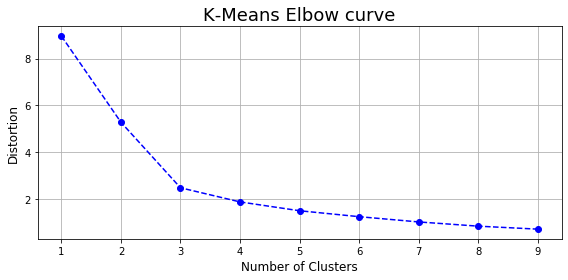

In [129]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0, n_init = 12, max_iter=300, tol=0.00001)
    kmeans.fit(clustering_df)
    distorsions.append(kmeans.inertia_)

fig, ax = subplots(figsize=(8, 4))
ax.plot(range(1, 10), distorsions, '--bo')
ax.set_xlabel('Number of Clusters', fontsize=12)
ax.set_ylabel('Distortion', fontsize=12)
plt.grid(True)
plt.title('K-Means Elbow curve', fontsize='18')
plt.tight_layout()
plt.show()

The above graph demonstrates that 3 is the optimum value for k

In [131]:
# venues_grouped_clustering_df = venues_grouped_df.drop('station', 1)
kmeans = KMeans(init="k-means++", n_clusters=3, random_state=0, n_init = 12, max_iter=300, tol=0.0001)
kmeans.fit(clustering_df)

kmeans.labels_

array([0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [133]:
# add clustering labels
grouped_df.insert(1, 'Cluster Label', kmeans.labels_)

In [134]:
grouped_df.head()

,Station Name,Cluster Label,Latitude,Longtitude,Min Distance from Station,Gym Count,Norm Min Distance from Station,Norm Gym Count
0,Waterloo London Underground Station,0,51.503321,-0.111038,151,13,-0.045216,-0.038876
1,Westminster London Underground Station,0,51.500922,-0.124802,105,13,-0.118116,-0.038876
2,Southwark London Underground Station,0,51.503771,-0.104739,188,18,0.013421,0.050409
3,Lambeth North London Underground Station,1,51.498521,-0.110355,333,7,0.243215,-0.146019
4,Embankment London Underground Station,0,51.507241,-0.122396,125,21,-0.086420,0.103981


In [136]:
cluster_colors = ['blue', 'purple', 'green'] 

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

markers_colors = []
for lat, lon, poi, cluster in zip(grouped_df['Latitude'], grouped_df['Longtitude'], 
                                  grouped_df['Station Name'], grouped_df['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster + 1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now visualize the (normalized) clusters distribution on a scatter plot along with their final corresponding centroids.

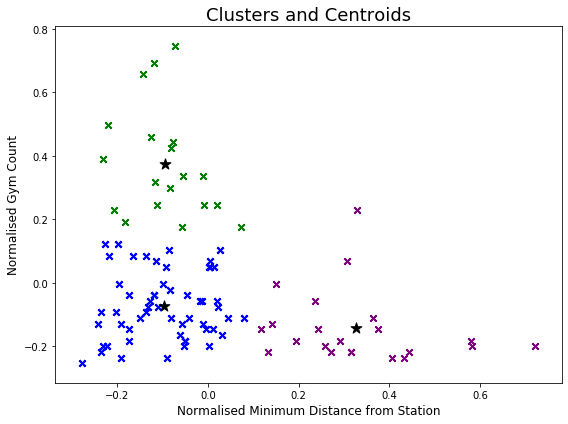

In [138]:
fig, ax = subplots(figsize=(8, 6))
for label in kmeans.labels_:
    plt.scatter(grouped_df[grouped_df['Cluster Label'] == label]['Norm Min Distance from Station'],
                grouped_df[grouped_df['Cluster Label'] == label]['Norm Gym Count'],
                marker='x', color=cluster_colors[label])
for centroid in kmeans.cluster_centers_:
#     print(centroid)
    plt.scatter(centroid[0], centroid[1], s=130, marker="*", color='black')
ax.set_xlabel('Normalised Minimum Distance from Station', fontsize=12)
ax.set_ylabel('Normalised Gym Count', fontsize=12)
plt.title('Clusters and Centroids', fontsize='18')
plt.tight_layout()
plt.show()

Show the stations that correspond to each cluster.


Cluster 1 (Blue markers) = AVERAGE potential

Although not a bad place to open a gym, there are already a fair number of gyms in the area and the nearest one is very close to the station.

In [139]:
grouped_df.loc[grouped_df['Cluster Label'] == 0]

,Station Name,Cluster Label,Latitude,Longtitude,Min Distance from Station,Gym Count,Norm Min Distance from Station,Norm Gym Count
0,Waterloo London Underground Station,0,51.503321,-0.111038,151,13,-0.045216,-0.038876
1,Westminster London Underground Station,0,51.500922,-0.124802,105,13,-0.118116,-0.038876
2,Southwark London Underground Station,0,51.503771,-0.104739,188,18,0.013421,0.050409
4,Embankment London Underground Station,0,51.507241,-0.122396,125,21,-0.086420,0.103981
6,Blackfriars London Underground Station,0,51.511657,-0.104052,36,22,-0.227466,0.121838
8,Holborn London Underground Station,0,51.517344,-0.120299,107,19,-0.114947,0.068266
10,Elephant & Castle London Underground Station,0,51.494720,-0.100489,144,8,-0.056309,-0.128162
12,Borough London Underground Station,0,51.501092,-0.093386,183,18,0.005497,0.050409
13,St. James's Park London Underground Station,0,51.499710,-0.134187,96,11,-0.132379,-0.074591
14,Chancery Lane London Underground Station,0,51.518265,-0.111577,196,21,0.026099,0.103981


Cluster 2 (Purple markers) = LOW potential

There are already many existing gyms in the area and the nearest gym is, in most cases, a relatively short distance from the station.

In [140]:
grouped_df.loc[grouped_df['Cluster Label'] == 1]

,Station Name,Cluster Label,Latitude,Longtitude,Min Distance from Station,Gym Count,Norm Min Distance from Station,Norm Gym Count
3,Lambeth North London Underground Station,1,51.498521,-0.110355,333,7,0.243215,-0.146019
5,Temple London Underground Station,1,51.511086,-0.113646,373,19,0.306607,0.068266
18,Kennington London Underground Station,1,51.488256,-0.105795,343,4,0.259063,-0.199591
28,Pimlico London Underground Station,1,51.489155,-0.133537,363,5,0.290759,-0.181734
35,Oval London Underground Station,1,51.482059,-0.112616,263,3,0.132280,-0.217448
38,Bond Street London Underground Station,1,51.514391,-0.149090,387,28,0.328794,0.228981
47,Sloane Square London Underground Station,1,51.492138,-0.155647,253,7,0.116432,-0.146019
48,Regent's Park London Underground Station,1,51.523599,-0.146851,274,15,0.149713,-0.003162
51,Bermondsey London Underground Station,1,51.497800,-0.063743,452,2,0.431805,-0.235305
52,Stockwell London Underground Station,1,51.472292,-0.122827,547,4,0.582359,-0.199591


Cluster 3 (Green markers) = HIGH potential

There are not many existing gyms in the area and the nearest gym is, in most cases, slightly further away from the station.

In [141]:
grouped_df.loc[grouped_df['Cluster Label'] == 2]

,Station Name,Cluster Label,Latitude,Longtitude,Min Distance from Station,Gym Count,Norm Min Distance from Station,Norm Gym Count
7,Charing Cross London Underground Station,2,51.507685,-0.128210,64,26,-0.183092,0.193266
9,Covent Garden London Underground Station,2,51.513012,-0.123941,127,32,-0.083251,0.300409
11,Leicester Square London Underground Station,2,51.511369,-0.128334,145,34,-0.054725,0.336124
15,Piccadilly Circus London Underground Station,2,51.510006,-0.134615,143,25,-0.057894,0.175409
16,Bank London Underground and DLR Station,2,51.513390,-0.087870,105,54,-0.118116,0.693266
17,St. Paul's London Underground Station,2,51.515023,-0.097361,131,40,-0.076912,0.443266
19,Cannon Street London Underground Station,2,51.511553,-0.090741,34,37,-0.230636,0.389695
21,Tottenham Court Road London Underground Station,2,51.516312,-0.130468,108,29,-0.113362,0.246838
23,Monument London Underground Station,2,51.510464,-0.086095,128,39,-0.081666,0.425409
24,Green Park London Underground Station,2,51.506734,-0.142630,226,25,0.073643,0.175409


<u> <h3> Discussion </h3> </u>

<h4> 

Clusters of areas (in our case underground stations) were identified as similar groups based on their potential as locations for opening a gym.

Possible areas that were not in the Foursquare database could also be examined in the future, or as a further project, so as to be even more certain as to desirable gym locations, rather than relying purely on one source of lacation data.

Additional factors could also be considered when choosing an appropriate location. For example:
    <ul> <li> Population density in the proposed locations </li>
        <li> The number and types of businesses in the proposed locations i.e. within walking distance of work/ the office </li>
        <li> Average age and household income of those living within the vicinity </li>

<u> <h3> Conclusion </h3> </u>
<h4> The above results are a good starting point for prospective business owners and could very easily be tailored to include different variables and even be used to propose ideal location for other businesses, not just gyms.
    
I'm sure that with more data and more work, it may even be possible to use this as a starting point to predict how lucrative certain locations may be in comparison to others; using various location data and information regarding the demographic of the people living in those areas.
    
Thank you for reading! </h4>


